In [17]:
pip install warnings

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings


In [7]:
import pandas as pd
#import warnings
#warnings.filtrerwarnings('ignore')
%matplotlib inline
import os 
#from datatime import datetime
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# ¿descargar las empresas que forman el SP500? puedes hacerlo de páginas web

sp_url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp500_constituents = pd.read_html(sp_url, header=0) [0]

In [13]:
sp500_constituents.columns

Index(['Symbol', 'Security', 'GICS Sector', 'GICS Sub-Industry',
       'Headquarters Location', 'Date added', 'CIK', 'Founded'],
      dtype='object')

In [14]:
sp500_constituents

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873


In [43]:
#¿Cual es el Symbol de la empresa Zimmer Biomet?
#creamos un dataframe del dataframe que cumpla que en la columna 'Security' nos de la fila entera donde esta 'Zimmer Biomet'
Zimmer=sp500_constituents[sp500_constituents['Security']=='Zimmer Biomet']
Zimmer

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded,Secutiry
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927,Zimmer Biomet


In [16]:
#Que 5 empresas son las más antiguas del índice
#Si inplace es True, la operación se realiza directamente en el DataFrame existente, y no se devuelve un nuevo DataFrame. 
#Eso hace que el dataframe cuando lo vuelva a usar este modificado
sp500_constituents.sort_values(by=['Date added'],inplace=True, ascending=True)
sp500_constituents.head(5)

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
292,LMT,Lockheed Martin,Industrials,Aerospace & Defense,"Bethesda, Maryland",1957-03-04,936468,1995
157,DTE,DTE Energy,Utilities,Multi-Utilities,"Detroit, Michigan",1957-03-04,936340,1995
244,IBM,IBM,Information Technology,IT Consulting & Other Services,"Armonk, New York",1957-03-04,51143,1911
369,PFE,Pfizer,Health Care,Pharmaceuticals,"New York City, New York",1957-03-04,78003,1849


In [18]:
#EJERCICIO 2
#Descargar los valores de PIB de USA del año 2022. ¿Qué periodicidad tiene estos datos? ¿Qué valores tienen los 3 últimos registros?
#Descarga el Índice del precio al consumo de consumidores urbanos y el de todos los productos menos comida y energía en ciudades de USA?. Visualiza los valores de 2022
import pandas_datareader.data as web 
import datetime
start=datetime.datetime(2022,1,1)
end=datetime.datetime(2022,12,31)
gdp=web.DataReader('GDP','fred',start,end)
gdp

,GDP
DATE,
2022-01-01,25029.116
2022-04-01,25544.273
2022-07-01,25994.639
2022-10-01,26408.405


In [22]:
start=datetime.datetime(2022,1,1)
end=datetime.datetime(2022,12,31)
IPC=web.DataReader('CORESTICKM159SFRBATL','fred',start,end)
IPC

,CORESTICKM159SFRBATL
DATE,
2022-01-01,3.988659
2022-02-01,4.307070
2022-03-01,4.558423
2022-04-01,4.721803
2022-05-01,4.985582
2022-06-01,5.422337
2022-07-01,5.625329
2022-08-01,5.991705
2022-09-01,6.392795


In [25]:
#EJERCICIO 3
import yfinance as yf
symbol='MSFT'
ticker=yf.Ticker(symbol)
df2=ticker.history(period='360d', interval='1d', actions=True, auto_adjust=True)

#si necesito fechas hacemos lo de start= y end=
df2

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-20 00:00:00-04:00,256.347640,261.249711,255.371181,258.685242,22788300,0.0,0.0
2022-07-21 00:00:00-04:00,256.239189,261.269488,253.516904,261.220154,22404700,0.0,0.0
2022-07-22 00:00:00-04:00,261.614666,261.703432,255.529015,256.801361,21881300,0.0,0.0
2022-07-25 00:00:00-04:00,257.432605,257.925771,253.299872,255.292252,21056000,0.0,0.0
2022-07-26 00:00:00-04:00,256.308179,256.327924,246.158846,248.456985,39348000,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,366.850006,372.399994,366.279999,370.730011,78478200,0.0,0.0
2023-12-18 00:00:00-05:00,369.450012,373.000000,368.679993,372.649994,21802900,0.0,0.0
2023-12-19 00:00:00-05:00,371.489990,373.260010,369.839996,373.260010,20603700,0.0,0.0


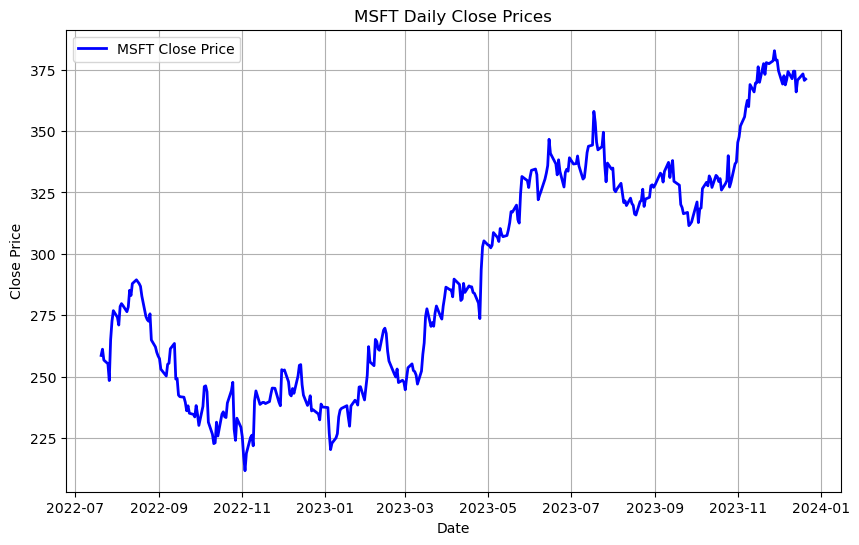

In [29]:
# Trama de líneas de los precios de cierre diarios
plt.figure(figsize=(10, 6))
plt.plot(df2['Close'], label=f'{symbol} Close Price', color='blue', linewidth=2)
plt.title(f'{symbol} Daily Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


<Axes: xlabel='Date'>

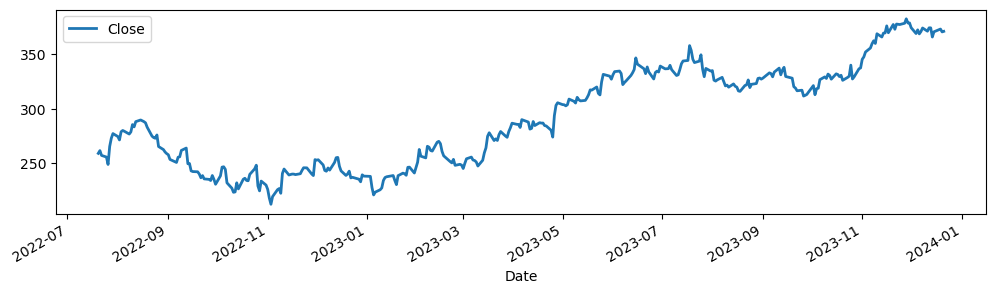

In [27]:
df2.plot.line(y='Close',figsize=(12,3),lw=2)

In [79]:
import yfinance as yf
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2021, 12, 31)
symbol = 'GOOGL'

ticker = yf.Ticker(symbol)
df3 = ticker.history(start=start, end=end, interval='1mo', actions=False, auto_adjust=True)

df3.head(48)

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-01 00:00:00-05:00,52.651001,59.900002,52.651001,59.111000,657748000
2018-02-01 00:00:00-05:00,58.799500,59.372501,49.849998,55.195999,1026814000
2018-03-01 00:00:00-05:00,55.477001,58.908001,49.200001,51.856998,1042336000
2018-04-01 00:00:00-04:00,51.381001,54.875500,49.712502,50.929001,984928000
2018-05-01 00:00:00-04:00,50.814999,55.907501,50.394501,55.000000,740734000
2018-06-01 00:00:00-04:00,55.643501,60.074501,55.303501,56.459499,803684000
2018-07-01 00:00:00-04:00,55.767502,64.571999,55.330002,61.361000,835654000
2018-08-01 00:00:00-04:00,61.955502,63.598000,60.200001,61.590000,685718000
2018-09-01 00:00:00-04:00,61.125999,61.393501,57.575001,60.354000,718518000


In [30]:
import yfinance as yf
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2021, 12, 31)
symbol = 'GOOGL'

ticker = yf.Ticker(symbol)
df3 = ticker.history(start=start, end=end, interval='1mo', actions=True, auto_adjust=True)

df3.head(48)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-01 00:00:00-05:00,52.651001,59.900002,52.651001,59.111000,657748000,0.0,0.0
2018-02-01 00:00:00-05:00,58.799500,59.372501,49.849998,55.195999,1026814000,0.0,0.0
2018-03-01 00:00:00-05:00,55.477001,58.908001,49.200001,51.856998,1042336000,0.0,0.0
2018-04-01 00:00:00-04:00,51.381001,54.875500,49.712502,50.929001,984928000,0.0,0.0
2018-05-01 00:00:00-04:00,50.814999,55.907501,50.394501,55.000000,740734000,0.0,0.0
2018-06-01 00:00:00-04:00,55.643501,60.074501,55.303501,56.459499,803684000,0.0,0.0
2018-07-01 00:00:00-04:00,55.767502,64.571999,55.330002,61.361000,835654000,0.0,0.0
2018-08-01 00:00:00-04:00,61.955502,63.598000,60.200001,61.590000,685718000,0.0,0.0
2018-09-01 00:00:00-04:00,61.125999,61.393501,57.575001,60.354000,718518000,0.0,0.0


In [2]:
#EJERCICIO 4 hay que buscar nasdaq_trader.py en el buscador de archivos
from pandas_datareader.nasdaq_trader import get_nasdaq_symbols
symbols = get_nasdaq_symbols()
#hay 11174 tipos de simbolos (ver en Index:)
symbols.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11174 entries, A to ZYXI
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Nasdaq Traded     11174 non-null  bool    
 1   Security Name     11174 non-null  object  
 2   Listing Exchange  11174 non-null  category
 3   Market Category   11174 non-null  object  
 4   ETF               11174 non-null  bool    
 5   Round Lot Size    11174 non-null  float64 
 6   Test Issue        11174 non-null  bool    
 7   Financial Status  5023 non-null   category
 8   CQS Symbol        6151 non-null   object  
 9   NASDAQ Symbol     11173 non-null  object  
 10  NextShares        11174 non-null  bool    
dtypes: bool(4), category(2), float64(1), object(4)
memory usage: 589.7+ KB


In [31]:
symbols.shape

(11174, 11)

In [3]:
symbols[symbols.ETF == True]

,Nasdaq Traded,Security Name,Listing Exchange,Market Category,ETF,Round Lot Size,Test Issue,Financial Status,CQS Symbol,NASDAQ Symbol,NextShares
Symbol,,,,,,,,,,,
AAA,True,Investment Managers Series Trust II AXS First ...,P,,True,100.0,False,NaN,AAA,AAA,False
AAAU,True,Goldman Sachs Physical Gold ETF Shares,Z,,True,100.0,False,NaN,AAAU,AAAU,False
AADR,True,AdvisorShares Dorsey Wright ADR ETF,Q,G,True,100.0,False,N,NaN,AADR,False
AAPB,True,GraniteShares 1.75x Long AAPL Daily ETF,Q,G,True,100.0,False,N,NaN,AAPB,False
AAPD,True,Direxion Daily AAPL Bear 1X Shares,Q,G,True,100.0,False,N,NaN,AAPD,False
...,...,...,...,...,...,...,...,...,...,...,...
ZROZ,True,PIMCO 25 Year Zero Coupon U.S. Treasury Index...,P,,True,100.0,False,NaN,ZROZ,ZROZ,False
ZSB,True,USCF ETF Trust USCF Sustainable Battery Metals...,P,,True,100.0,False,NaN,ZSB,ZSB,False
ZSC,True,USCF ETF Trust USCF Sustainable Commodity Stra...,P,,True,100.0,False,NaN,ZSC,ZSC,False
